# TASK 5: SALES PREDICTION USING PYTHON

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Load the Advertising dataset
file_path = 'C:\\Users\\murug\\OneDrive\\Desktop\\Advertising.csv'
df = pd.read_csv('C:\\Users\\murug\\OneDrive\\Desktop\\Advertising.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


## Split the data into features and target

In [4]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


## EVALUATE THE MODEL

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Mean Squared Error: {mse:.2f}")
print(f"Model R^2 Score: {r2:.2f}")

## VISUALIZATION

### 1.BAR CHART OF FEATURE IMPORATANCES

In [7]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

### 2.HISTOGRAM 

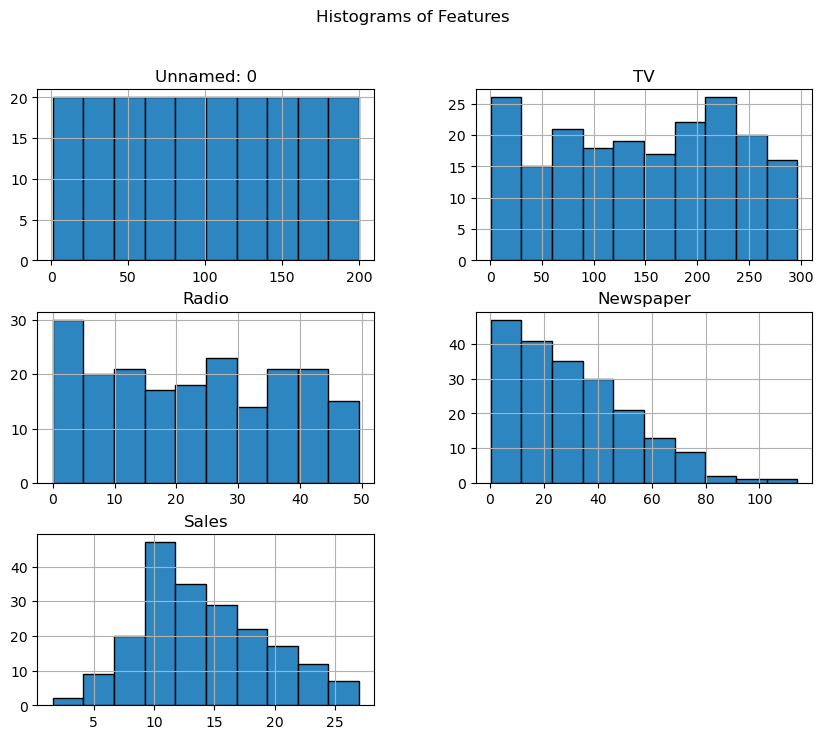

In [9]:
df.hist(figsize=(10, 8), bins=10, color='#2E86C1', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()


### 3.Correlation heatmap

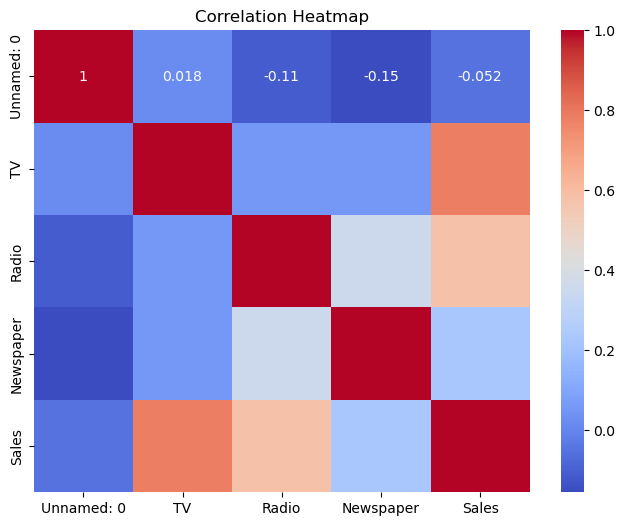

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

### 4.  Actual vs Predicted Sales Scatter plot


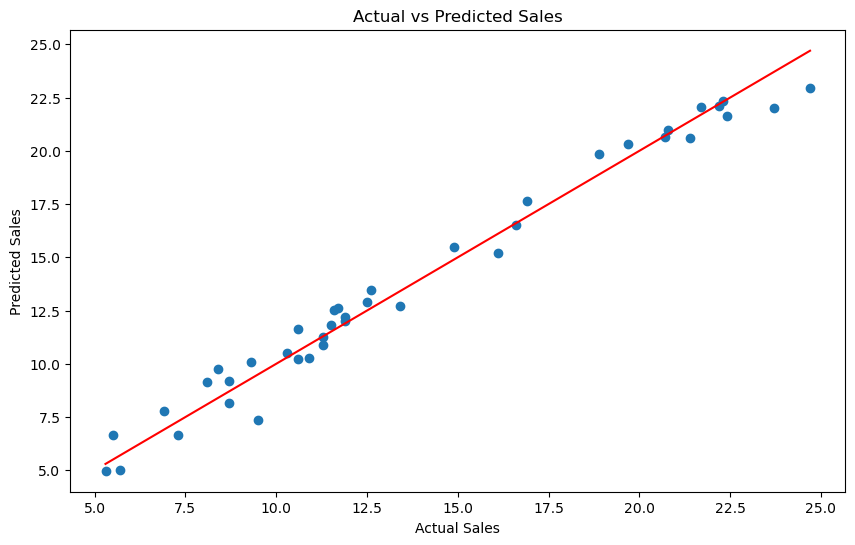

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()